In [9]:
from keras.datasets import cifar100
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

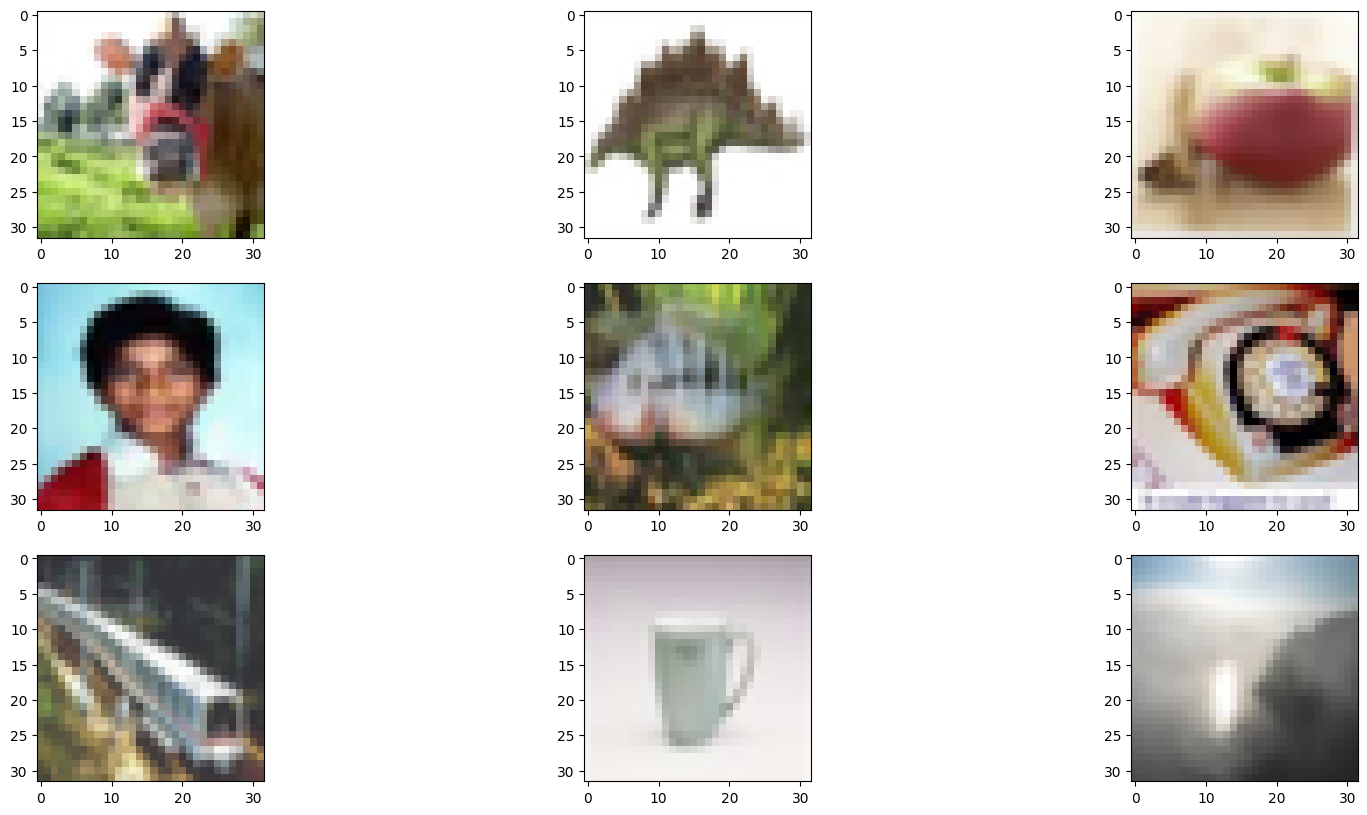

In [10]:
import matplotlib.pyplot as plt
n=9
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()

In [11]:
import cv2 
import numpy as np
X_train_grayscale = np.zeros(X_train.shape[:-1])
for i in range(X_train.shape[0]): 
    X_train_grayscale[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
X_train = X_train_grayscale

X_test_grayscale = np.zeros(X_test.shape[:-1])
for i in range(X_test.shape[0]): 
    X_test_grayscale[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)
X_test = X_test_grayscale

In [12]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [13]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = "relu", input_shape = (32,32,1),padding = "same"))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2),padding = "same"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [14]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics= ['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_data=[X_test,Y_test])

2022-11-01 18:19:36.502093: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 195.31MiB (rounded to 204800000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-11-01 18:19:36.502210: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2022-11-01 18:19:36.502260: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 21, Chunks in use: 21. 5.2KiB allocated for chunks. 5.2KiB in use in bin. 916B client-requested in use in bin.
2022-11-01 18:19:36.502286: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2022-11-01 18:19:36.502305: I tens

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
classnames = ["apple",'aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly',"camel","can","castle","catepillar","cattle","chair","chimpanzee","clock","cloud",
              "cockroach","couch","cra","crocodile","cup","dinosaur","dolphine","elephant","flatfish","forest","fox","girl", "hamster","house","kangaroo","keyboard","lamp","lawn_mover","leopard","lion","lizard","lobster",
               "man",'maple_tree','motorcycle','mountain','mouse','mushroom',"oak tree","orange","orchild","otter","palm tree","pear","pickup_truck","pine_tree","plain","plate","poppy","porcupine","possum","rabbit",
               "raccoon","ray","road","rocket","rose","sea","seal","shark","shrew","skunk","skyscraper","snail","snake","spider","squirrle","streetcar","sunflower","sweet pepper","table","tank","telephone","television",
               "tiger","tractor","train","trout","tulip","turtle","wardrobe","whale","willow tree","wolf","woman","worm"]


